**TITLE: PREDICTION OF SALES BASED ON THE MONEY SPENT ON TV, RADIO, AND NEWSPAPER FOR MARKETING** 

**INTRODUCTION**

Supervised learning is the machine learning task of learning a function that maps an input to an output based on example input-output pairs. It infers a function from labeled training data consisting of a set of training examples. In supervised learning, each example is a pair consisting of an input object (typically a vector) and a desired output value (also called the supervisory signal). A supervised learning algorithm analyzes the training data and produces an inferred function, which can be used for mapping new examples. An optimal scenario will allow for the algorithm to correctly determine the class labels for unseen instances. Here we will be using linear regression for prediction which is one of the most widely used Supervised ML algorithm.

Ridge regression is also a linear model for regression, so the formula it uses to make predictions is the same one used for ordinary least squares. In ridge regression, though, the coefficients (Beta) are chosen not only so that they predict well on the training data, but also to fit an additional constraint. We also want the magnitude of coefficients to be as small as possible; in other words, all entries of Beta should be close to zero. Intuitively, this means each feature should have as little effect on the outcome as possible (which translates to having a small slope), while still predicting well. This constraint is an example of what is called regularization. Regularization means explicitly
restricting a model to avoid overfitting. The particular kind used by ridge regression is known as L2 regularization.

Linear Regression is a linear approach to model the relationship between a scalar response and one or more explanatory variables (also known as dependent and independent variables). The case of one explanatory variable is called simple linear regression; for more than one, the process is called multiple linear regression.

**OBJECTIVES**

Here, our main objective is to 

a) Build a Multiple Linear Regression Model to predict sales based on the money spent on TV, Radio, and Newspaper for advertising using ridge regression.

b) To make a comparative study between the results obtained using Ridge regression and Linear Regression.

c) To perform the residual analysis.

**PACKAGES AND LIBRARIES**

In [ ]:
#Loading the pandas and numpy that will be used to handle the data.
import pandas as pd
import numpy as np

#Loading matplotlib and seaborn which is required to perform the exploratory data analysis.
import seaborn as sns 
import matplotlib.pyplot as plt

#Importing the packages required for ridge regression.
from numpy import arange
from pandas import read_csv
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import RepeatedKFold

#Importing OLS, Ridge
from sklearn.linear_model import LinearRegression, Ridge

#Loading the functions required for model evaluation
from sklearn.metrics import r2_score, mean_squared_error


**DATA DESCRIPTION**

Here in this practical we are considereing the marketing dataset which is a data frame containing the impact of three advertising medias (TV, Radio, Newspaper) on sales. Data are the advertising budget in thousands of dollars along with the sales. The advertising experiment has been repeated 200 times.

Here, our response variable is sales and regressors are advertising budget of advertising medias TV, Radio, and Newspaper.


The dataset consists of records of 200 observations. the different variables used for buiding the regression model from the dataset are:


**Depentent variable-**
y: Sales of advertising medias.    
**Independent variable-**         
x1: Money spent on TV for advertising.       
x2: Money spent on Radio for advertising.                            
x3: Money spent on Newspaper for advertising.                      
           


In [ ]:
#Loading the required dataset.
advertising=pd.read_csv("/content/advertising.csv")

#Viewing 'advertising' data set.
advertising

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


**EXPLORATORY DATA ANALYSIS**

In [ ]:
#Obtaining the dimension of the dataset.
advertising.shape

(200, 4)

It is observed that the dataset comprises of 200 records and 4 columns(variables) which are described in the data description. 

In [ ]:
#Using info() function to understand if ther is any null values in the dataset.
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


From the above table it is observed that there does not exist any null value in the dataset hence we can further proceed with the analysis.

In [ ]:
#Obtaining the descriptive measure using describe() function
advertising.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


Thus, from the above summary we interpret that radio is all having almost equal mean and median thus we may assume that the variable is normally distributed. We also obsereve from the table for the variables sales, radio, TV, Newspaper that their 75th percentile and maximum value does not have a huge difference thereforewe can assume that there do not exist any outliers in the dataset but we will verify the same in the later stage with the helpof box and whisker plot. On similar lines we can draw meaningful insights about the other variables using the summary table.

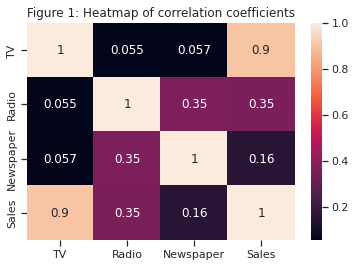

In [ ]:
#Obtaining the heatmap of correlation coefficients of all the variables.
sns.heatmap(advertising.corr(), annot = True)
plt.title('Figure 1: Heatmap of correlation coefficients')
plt.show()

Text(0.5, 1.0, '[Figure 2]')

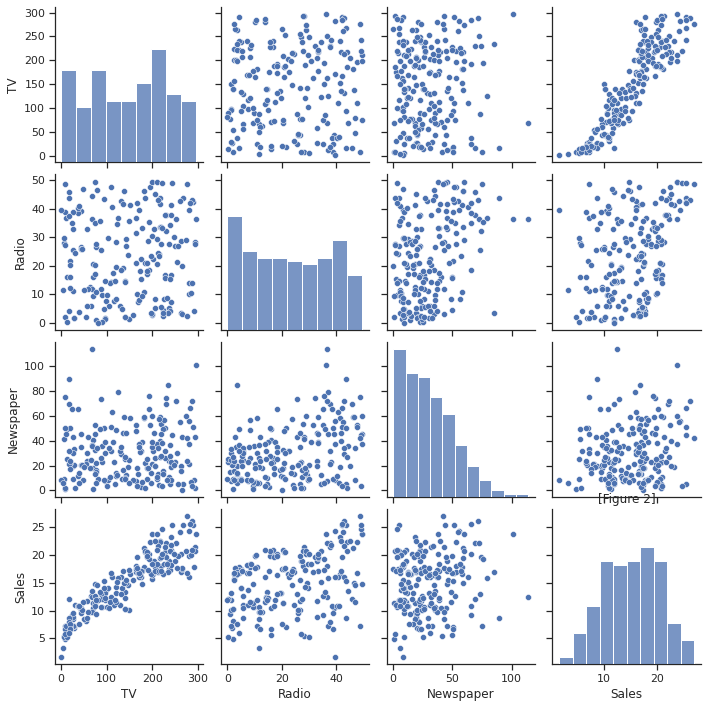

In [ ]:
#Obtaining the scatterplot matrix for all the variables under study.
import seaborn as sns
sns.set_theme(style="ticks")
sns.pairplot(advertising)
plt.title('[Figure 2]')

Thus, from the heat map and scatter plot matrix in figure 1 it is observed that  sales and TV is highly positively related with coefficient of correlation 0.901208, sales and Radio is positively related with coefficient of correlation 0.349631, and sales and Newspaper is  positively related with coefficient of correlation 0.157960. It is also observed that the correlation coefficient between regressors is less than 0.5 thus, there does not exist multicolinearity in the dataset.	

Text(0, 0.5, 'Sales')

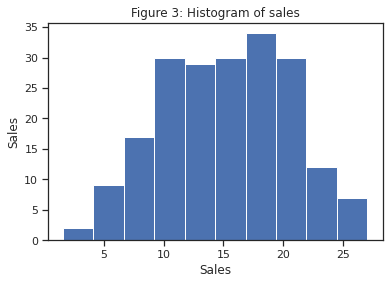

In [ ]:
#Histogram for sales
plt.hist(advertising['Sales'])
plt.title('Figure 3: Histogram of sales')
plt.xlabel('Sales')
plt.ylabel('Sales')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Sales')

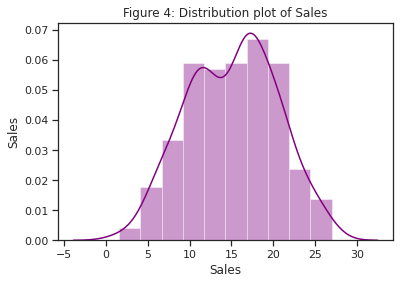

In [ ]:
#Distribution plot for sales
sns.distplot(advertising['Sales'], color = 'purple')
plt.title('Figure 4: Distribution plot of Sales')
plt.xlabel('Sales')
plt.ylabel('Sales')


Thus, from the above histogram and distribution plot (Figure 2 & Figure 3 respectively) it is observed that the data of the sales of advertising media is symmetric thus sales is normally distributed.

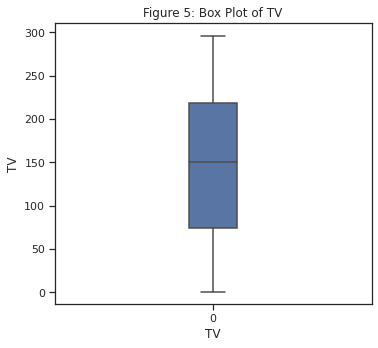

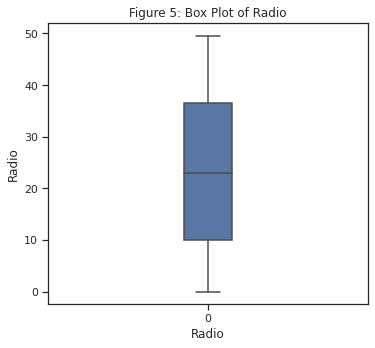

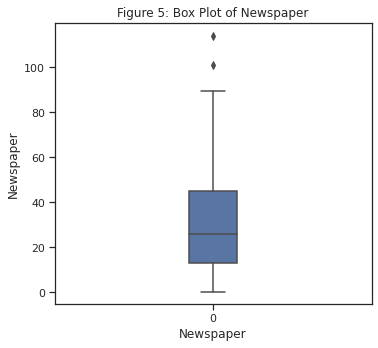

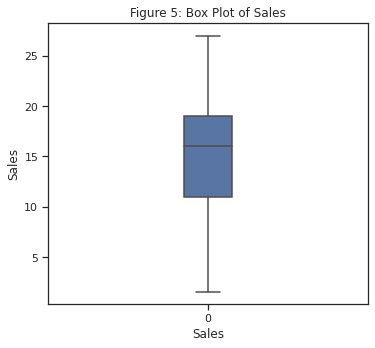

In [ ]:
#Here we obtain the boxplot for the variables to check for the outliers of the data.
data=advertising.columns
data
value=data[0:4]
value
for i in value:
  fig=plt.figure(figsize=(10,5))
  ax=fig.add_subplot(122)
  sns.boxplot(data=advertising[i],palette='deep',width=0.15,ax=ax)
  ax.set_title("Figure 5: Box Plot of "+i)
  ax.set_xlabel(i)
  ax.set_ylabel(i)
  plt.tight_layout()
  plt.show()

Thus, from the above boxplots for each variable in (Figure 5) it is observed that there exists outliers data of budget associated with Newspaper.

Since, our main objective is to build a multiple linear regression model to predict sales based on the money spent on TV, Radio, and Newspaper for advertising using ridge regression and perform a comparative study with linear regression using ols method. Therefore, the multiple linear regression model is Y = β0 + β1*X1 + β2*X2 + β3*X3 + ε

**ANALYSIS**

In [ ]:
#Dropping the variables from the daataset which is not needed obtaining the subset of independent variables and asigning them to X.
X=advertising.drop(['Sales'],axis=1)

#Extracting the variable y i.e. independent variable.
y=advertising["Sales"]

In [ ]:
#Displaying all the independent variables.
X

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [ ]:
#Displaying the dependent variable Car price.
y

0      22.1
1      10.4
2      12.0
3      16.5
4      17.9
       ... 
195     7.6
196    14.0
197    14.8
198    25.5
199    18.4
Name: Sales, Length: 200, dtype: float64

In [ ]:
#importing train_test_split from the sklearn.model_selection library which will help us to split the
#data arrays into two subsets i.e. training data and testing data. 
from sklearn.model_selection import train_test_split

In [ ]:
#Splitting the datset into two subsets i.e. training data and testing data.
x_train,x_test,y_train,y_test=train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state = 42)

Thus, the dataset has been splitted into train and test data.

In [ ]:
#viewing the train data for all the independent variable.
x_train

,TV,Radio,Newspaper
79,116.0,7.7,23.1
197,177.0,9.3,6.4
38,43.1,26.7,35.1
24,62.3,12.6,18.3
122,224.0,2.4,15.6
...,...,...,...
106,25.0,11.0,29.7
14,204.1,32.9,46.0
92,217.7,33.5,59.0
179,165.6,10.0,17.6


In [ ]:
#viewing the train data for car price.
y_train

79     11.0
197    14.8
38     10.1
24      9.7
122    16.6
       ... 
106     7.2
14     19.0
92     19.4
179    17.6
102    19.8
Name: Sales, Length: 160, dtype: float64

MODEL BUILDING

**1. MULTIPLE LINEAR REGRESSION USING OLS METHOD**

In [ ]:
#Importing the library
from sklearn.linear_model import LinearRegression

In [ ]:
#Fitting the Multiple Linear Regression model
model_ols = LinearRegression()  
model_ols.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Thus, the multiple linear regression model is fitted.

In [ ]:
#Intercept and Coefficient for the model equation
print("Intercept: ", model_ols.intercept_)
print("Coefficients:")
list(zip(X, model_ols.coef_))

Intercept:  4.714126402214127
Coefficients:


[('TV', 0.05450927083721978),
 ('Radio', 0.10094536239295579),
 ('Newspaper', 0.0043366468220340446)]

Multiple Linear Regression Equation using OLS method:

Sales = 4.7931+ (0.0535 * TV) + (0.1089* Radio) + (-0.0014 * Newspaper) + e

From the above-obtained equation for the Multiple Linear Regression Model, we can see that the value of intercept is 4.7931, which shows that if we keep the money spent on TV, Radio, and Newspaper for advertisement as 0, the estimated average sales will be 4.7931 and a single rupee increase in the money spent on TV for advertisement increases sales by 0.0.0535, the money spent on Radio for advertisement increases sales by 0.1089, and the money spent on Newspaper for advertisement increases sales by -0.0014.

In [ ]:
#Prediction of test set
y_pred_ols= model_ols.predict(x_test)

#Predicted values
print("Prediction for test set: {}".format(y_pred_ols))

Prediction for test set: [17.0347724  20.40974033 23.72398873  9.27278518 21.68271879 12.56940161
 21.08119452  8.69035045 17.23701254 16.66657475  8.92396497  8.4817344
 18.2075123   8.06750728 12.64550975 14.93162809  8.12814594 17.89876565
 11.00880637 20.47832788 20.80631846 12.59883297 10.9051829  22.38854775
  9.41796094  7.92506736 20.83908497 13.81520938 10.77080925  7.92682509
 15.95947357 10.63490851 20.80292008 10.43434164 21.5784752  21.18364487
 12.12821771 22.80953262 12.60992766  6.46441252]


Thus, the predicted sales value are obtained based on test data.

In [ ]:
#Actual value and the predicted value(OLS method)
mlr_diff_ols = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_ols})
mlr_diff_ols.head()

,Actual value,Predicted value
95,16.9,17.034772
15,22.4,20.409740
30,21.4,23.723989
158,7.3,9.272785
128,24.7,21.682719


We compare the predicted values called y_pred_mlr with y_test values to check how accurate our predicted values are.

In [ ]:
#Model Evaluation (OLS method)
from sklearn import metrics
meanAbErr = metrics.mean_absolute_error(y_test, y_pred_ols)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_ols)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_ols))
print('R squared using OLS Method: {:.2f}'.format(model_ols.score(X,y)*100))
print('Mean Absolute Error using OLS Method:', meanAbErr)
print('Mean Square Error using OLS Method:', meanSqErr)

R squared using OLS Method: 90.20
Mean Absolute Error using OLS Method: 1.2748262109549338
Mean Square Error using OLS Method: 2.9077569102710896


From the above summary it is observed that the coefficient of determination is 90.20 which idicates that the model is good and the variability in sales is well explained by money spent on advertising media TV, Radi, Newspaper.

In [ ]:
#Getting coefficient of determination for multiple linear regression for training data using OLS method
print("Training set score using OLS Method: {:.2f}".format(model_ols.score(x_train,y_train)))
print("Test set score using OLS Method: {:.2f}".format(model_ols.score(x_test,y_test)))

Training set score using OLS Method: 0.90
Test set score using OLS Method: 0.91


This discrepancy between performance on the training set and the test set is a clear sign of overfitting, and therefore we should try to find a model that allows us to control complexity. One of the most commonly used alternatives to standard linear regression is ridge regression, which we will look into next.

**2. MULTIPLE LINEAR REGRESSION USING RIDGE ESTIMATORS**

In [ ]:
#Define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

In [ ]:
#Define model
model_ridge = RidgeCV(alphas=arange(0, 2, 0.01), cv=cv, scoring='neg_mean_absolute_error').fit(x_train,y_train)

In [ ]:
#Summarize chosen configuration
print('alpha: %f' % model.alpha_)

alpha: 0.000000


Thus, the alpha=0 which is a penalty term which will be used to to build a ridge regression model, which means that our ridge regression model will be equivalent to linear regression model by ols method. Thus, we proceed to build a ridge regression model and check our results by comparing.

In [ ]:
#Fitting a regression model on th training data
model_ridge=Ridge(alpha=0,normalize=True)
model_ridge.fit(x_train,y_train)


Ridge(alpha=0, copy_X=True, fit_intercept=True, max_iter=None, normalize=True,
      random_state=None, solver='auto', tol=0.001)

Thus, the Ridge regression model is fitted.

In [ ]:
#Getting the coefficient of regression associated with each regressor.
print(pd.Series(model_ridge.coef_, index = X.columns))

TV           0.054509
Radio        0.100945
Newspaper    0.004337
dtype: float64


The coefficient associated with each regressor variables is obtained.

In [ ]:
#Getting the intercept of regression model.
model_ridge.intercept_

4.714126402214134

Thus, the intercept term is obtained associated with multiple linear regression model is obtained.

In [ ]:
#Getting coefficient of determination for multiple linear regression for testing and training data using Ridge method
print("Training set score using Ridge Regression: {:.2f}".format(ridge.score(x_train, y_train)))
print("Test set score using Ridge Regression: {:.2f}".format(ridge.score(x_test, y_test)))

Training set score using Ridge Regression: 0.90
Test set score using Ridge Regression: 0.91


From the above calculation it is observed that the testing and training set score for ridge regression model is also obtained same as linear regression by ols method.

In [ ]:
#Prediction of test set
y_pred_ridge= model_ridge.predict(x_test)

#Predicted values
print("Prediction for test set (Ridge Regression): {}".format(y_pred_ridge))

Prediction for test set (Ridge Regression): [17.0347724  20.40974033 23.72398873  9.27278518 21.68271879 12.56940161
 21.08119452  8.69035045 17.23701254 16.66657475  8.92396497  8.4817344
 18.2075123   8.06750728 12.64550975 14.93162809  8.12814594 17.89876565
 11.00880637 20.47832788 20.80631846 12.59883297 10.9051829  22.38854775
  9.41796094  7.92506736 20.83908497 13.81520938 10.77080925  7.92682509
 15.95947357 10.63490851 20.80292008 10.43434164 21.5784752  21.18364487
 12.12821771 22.80953262 12.60992766  6.46441252]


In [ ]:
#Actual value and the predicted value (Ridge Regression)
mlr_diff_ridge = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_ridge})
mlr_diff_ridge.head()

,Actual value,Predicted value
95,16.9,17.034772
15,22.4,20.409740
30,21.4,23.723989
158,7.3,9.272785
128,24.7,21.682719


In [ ]:
#Model Evaluation
from sklearn import metrics
meanAbErr = metrics.mean_absolute_error(y_test, y_pred_ridge)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_ridge)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_ridge))
print('R squared using Ridge Regression: {:.2f}'.format(model_ridge.score(X,y)*100))
print('Mean Absolute Error using Ridge Regression:', meanAbErr)
print('Mean Square Error using Ridge Regression:', meanSqErr)

R squared using Ridge Regression: 90.20
Mean Absolute Error using Ridge Regression: 1.274826210954934
Mean Square Error using Ridge Regression: 2.9077569102710905


Thus, in the above calculation all the model evaluation measures are obtained for Ridge regression which is similar to Linear regression using ols method.

In [ ]:
#Calculation of VIF nad checking multicolinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]
vif["features"] = x_train.columns
  

In [ ]:
#Obtaining the table of variance inflation factor.
vif.round(1)

,VIF Factor,features
0,2.5,TV
1,3.5,Radio
2,3.3,Newspaper


Thus, we observe that the vif associated with each regresseor variable is less than 5 hence we can say that there does not exists multicolinearity between the independent variables.

**MULTIPLE LINEAR REGRESSION USING RIDGE ESTIMATORS**

1. COEFFICIENTS USING RIDGE REGRESSION

  Thus, the parameters β0 =  4.7141, β1 =   0.0545, β2 =  0.1009, β3 = 0.0043 obtained using Ridge estimators.


2. TRAINING & TEST SET SCORE

  Training set score using Ridge Regression: 0.90

  Test set score using Ridge Regression: 0.91

3. SUMMARY MEASURES

  R squared using Ridge Regression: 90.20

  Mean Absolute Error using Ridge Regression: 1.2748

  Mean Square Error using Ridge Regression: 2.9078

**MULTIPLE LINEAR REGRESSION USING OLS METHOD**

1. COEFFICIENTS USING OLS METHOD

  Thus, the parameters β0 =  4.7141, β1 = 0.0545, β2 = 0.1009, β3 = 0.0043 are obtained above using OLS method.

2. TRAINING & TEST SET SCORE

  Training set score using OLS Method: 0.90
  
  Test set score using OLS Method: 0.91

3. SUMMARY MEASURES

  R squared using OLS Method: 90.20

  Mean Absolute Error using OLS Method: 1.2748

  Mean Square Error using OLS Method: 2.9078
.

Thus, from the above summary for both the methods and on comparison we observe that the estimates, training & testing set scores and model evaluation measures are all equal for both the techniques.

It is was also observed that the penalty term obtained using Ridge regression was 0.

All these facts are evident to the situation that in this dataset the Ridge regression is equivalent to the linear regression using ols method.

Also we observed that there does not exist multicolinearity in the dataset and we apply Ridge regression mostly when we have multicolinearity in the dataset to reduce the complexity and also the coefficient of determination is 90.20 which is a strong evidence to the fact that our model is a good model whith 90.20% variability expained by money spent on TV, Radio, Newspaper in the sales.

**RESIDUAL ANALYSIS**

Now, since we have the built regression model, now we check the goodness of fit by validating the assumptions associated with the fitted model.
The following are the assumtions regarding the fitted model,
1.	The relationship beetween y and x1,x2,X3 is linear.
2.	Errors have zero mean.
3.	Assumption of homoscedasticity, i.e. the errors have   constant variance.
4.	Errors are uncorrelated.
5.	Errors are normally distributed random variables.


**1. To check if the relationship beetween y and x1, x2, x3 is linear.**

From the scatter plot matrix i.e. figure 1 obtained above we can conclude that the relationship between y and x1, x2, x3 is linear.

In [ ]:
#Obtaining residuals corresponding to the fitted regression model.
y_train_pred = model.predict(x_train)
resid = (y_train - y_train_pred)
resid

79    -0.808969
197   -0.471096
38     0.139956
24     0.225016
122   -0.422606
         ...   
106   -0.088644
14    -0.237818
92    -0.613293
179    2.878180
102   -1.061394
Name: Sales, Length: 160, dtype: float64

Thus, residual of the fitted model are obtained above.

 **2. To check if the mean of the residuals is 0.**

In [ ]:
#Obtaining the mean of the residuals
import statistics
statistics.mean(resid)

0.05727579970779725

From the above calculation we observe that mean of residuals is 0 hence it can be concluded that the errors has mean zero.

**3. To check assumption of homscedasticity i.e. variance of residuals is constant.**

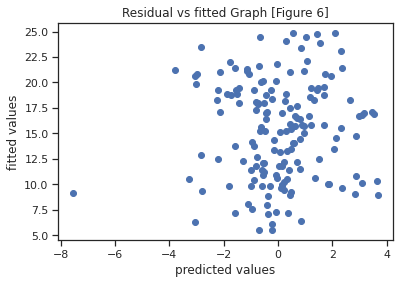

In [ ]:
#Obtaining the scatterplot between predicted values and residuals 
plt.scatter(resid, y_train_pred)
plt.title("Residual vs fitted Graph [Figure 6]")
plt.xlabel("predicted values")
plt.ylabel("fitted values")
plt.show()

Thus, from the figure 6 it is observed that the points are randomly scattered over the plot hence we conclude that the errors have constant variance.

**4. To check if the errors are uncorrelated.**

In [ ]:
#Import numpy and statsmodels
import numpy as np
from statsmodels.stats.stattools import durbin_watson
  
#Using statsmodels.durbin_watson() method to check for normality
val = durbin_watson(resid)
  
print(val)

2.0754479026808315


From the durbin watson test obtained above in the analysis section it is observed that the durbin watson statistics is 2.2459 which means that the errors are uncorrelated. Hence, assumption about normality is also satisfied.

**5. To check normality assumption i.e to check if the residuals are normally distributed.**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


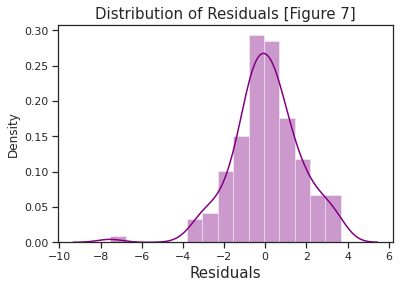

In [ ]:
#Obtaining the distribution plot of residuals.
fig = plt.figure()
sns.distplot(resid, bins = 15, color = "purple")
plt.title('Distribution of Residuals [Figure 7]', fontsize = 15)
plt.xlabel('Residuals', fontsize = 15)
plt.show()

Thus, we obtained the histogram we observe from the above (Figure 7) that the histogram  is symmetric and errors are normally distributed.

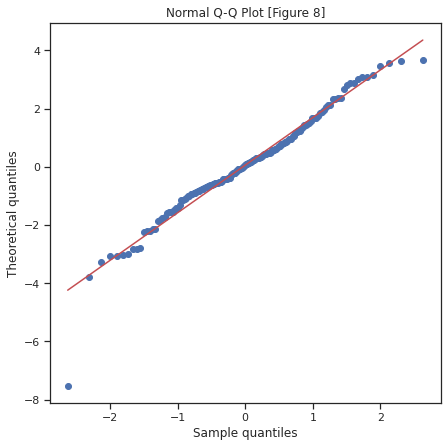

In [ ]:
#Obtaining the Q-Q plot to check for the normality assumption.
import scipy.stats as stats
plt.figure(figsize=(7,7))
stats.probplot(resid, dist="norm", plot=plt)
plt.title("Normal Q-Q Plot [Figure 8]")
plt.xlabel("Sample quantiles")
plt.ylabel("Theoretical quantiles")
plt.show()

Thus it is observed in the above figure (figure 8 ) that the points almost aligned to the staright line hence we can conclude that the errors are normallly distributed.

In [ ]:
#Performing the shapiro-wilks test to check for normality assumption.
from scipy import stats
shapiro_test = stats.shapiro(resid)
shapiro_test

(0.9696859121322632, 0.0013798302970826626)

Thus, from the above statistical test it is observed that p value = 0.1864 > 0.05 thus we accept the null hypothesis and conclude that the residuals are normally distributed.

Thus, we observe that all the assumptions about errors are satisfied and hence we can say that our model is a good fit.

PREDICTION USING TEST DATA

In [ ]:
#Predicting the hospital discharge cost using the test data.
y_test_pred = model_ridge.predict(x_test)
y_test_pred

array([17.0347724 , 20.40974033, 23.72398873,  9.27278518, 21.68271879,
       12.56940161, 21.08119452,  8.69035045, 17.23701254, 16.66657475,
        8.92396497,  8.4817344 , 18.2075123 ,  8.06750728, 12.64550975,
       14.93162809,  8.12814594, 17.89876565, 11.00880637, 20.47832788,
       20.80631846, 12.59883297, 10.9051829 , 22.38854775,  9.41796094,
        7.92506736, 20.83908497, 13.81520938, 10.77080925,  7.92682509,
       15.95947357, 10.63490851, 20.80292008, 10.43434164, 21.5784752 ,
       21.18364487, 12.12821771, 22.80953262, 12.60992766,  6.46441252])

Thus, we obtained above the predicted advertising sales for the given test data.

**CONCLUSION**

Thus, from the above analysis it is observed that since the coefficient of determintion is 90.20 and all the assumptions about errors are satisfied therefore the multiple linear regression model that is fitted to predict  sales based on the money spent on TV, Radio, and Newspaper for marketing is a good fit. We observe that coefficient of determintion is90.20 which is quite high and which means that this model explains about 90.20 of variability in the dependent variable.Also all the assumptions about residuals are satisfied in residual analysis.

Thus, the multiple linear regression model obtained above is good to predict  sales based on the money spent on TV, Radio, and Newspaper for marketing.

And since our model was good and there was no multicolinearity existing in the dataset thus, the penalty term for ridge regression was coming as 0 and thus, all the results obtained using linear regression by ols method is same as Ridge regresssion.